# Pandas

## 1. Series

In [150]:
# !pip install pandas

from pandas import Series

In [151]:
fruit = Series([2500, 3800, 1200, 600], index = {'apple', 'banana', 'peer', 'cherry'})  

In [152]:
fruit

cherry    2500
banana    3800
apple     1200
peer       600
dtype: int64

* Series를 사용해서 데이터 타입은 정수형으로 되어 있다. 그리고 index는 과일, 가격은 값으로 되어 있다.

In [153]:
# 값과 인덱스를 추출
print(fruit.values)
print(fruit.index)

[2500 3800 1200  600]
Index(['cherry', 'banana', 'apple', 'peer'], dtype='object')


* 값과 인덱스 2개를 출력하고 싶으면 print()를 사용해서 출력해준다.

In [154]:
# Dict 표현
fruitData = {'apple': 2500, 'banana': 3800, 'peer': 1200, 'cherry': 600}
fruit = Series(fruitData) # 딕셔너리를 Series를 사용해서 Series로 만들 수 있다.

* python안에 있는 딕셔너리를 사용함.

In [155]:
print(type(fruitData))
print(type(fruit))

<class 'dict'>
<class 'pandas.core.series.Series'>


* 첫번째는 딕셔너리 타입, 두번째는 pandas의 Series의 객체이다.

In [156]:
fruit

apple     2500
banana    3800
peer      1200
cherry     600
dtype: int64

* 인덱스만 있지 칼럼의 명은 없다.

In [157]:
# Series 객체의 이름과 컬럼명을 설정을 해 봅니다.

fruit.name = 'fruitPrice'
fruit.index.name = 'fruitName'

In [158]:
fruit

fruitName
apple     2500
banana    3800
peer      1200
cherry     600
Name: fruitPrice, dtype: int64

* 객체 자체는 fruitPrice로 되어있고, 컬럼명은 fruitName으로 되어 있다.

## 2. DataFrame

In [159]:
# DataFrame

fruitData = {'fruitName':['apple', 'banana', 'cherry', 'peer'],
             'fruitPrice': [2500, 3800, 6000, 1200],
             'num': [10, 5, 3, 8]}

In [160]:
from pandas import DataFrame
fruitFrame = DataFrame(fruitData)

* fruitData로 딕셔너리로 만들고 나중에 DataFrame으로 만들었다.

In [161]:
fruitFrame

,fruitName,fruitPrice,num
0,apple,2500,10
1,banana,3800,5
2,cherry,6000,3
3,peer,1200,8


In [162]:
# 컬럼 순서 지정하기

fruitFrame = DataFrame(fruitData, columns = ['fruitPrice', 'num', 'fruitName'])  # 컬럼은 축의 개념으로 나타낸다.
fruitFrame

,fruitPrice,num,fruitName
0,2500,10,apple
1,3800,5,banana
2,6000,3,cherry
3,1200,8,peer


In [163]:
# 특정 항목 추출하기
fruitFrame['fruitName']

0     apple
1    banana
2    cherry
3      peer
Name: fruitName, dtype: object

In [164]:
fruitFrame.fruitName  # 객체지향적으로 이렇게 출력할 수도 있다. .을 찍어서 하게되면 속성으로 인식을 하게 된다.

0     apple
1    banana
2    cherry
3      peer
Name: fruitName, dtype: object

In [165]:
# 컬럼 추가하기
fruitFrame['Year'] = '2022'

In [166]:
fruitFrame

,fruitPrice,num,fruitName,Year
0,2500,10,apple,2022
1,3800,5,banana,2022
2,6000,3,cherry,2022
3,1200,8,peer,2022


In [167]:
# Series 객체의 추가

variable = Series([4, 2, 1], index = [0, 2, 3]) 

fruitFrame['Stock'] = variable

fruitFrame

,fruitPrice,num,fruitName,Year,Stock
0,2500,10,apple,2022,4.0
1,3800,5,banana,2022,NaN
2,6000,3,cherry,2022,2.0
3,1200,8,peer,2022,1.0


* 객체를 추가할 때, index를 사용하면 꼭 1대 1로 매칭 되지 않더라고 인덱스에 맞게 추가가 된다.
* NaN 값은 나중에 따로 처리를 해주어야 한다.

In [168]:
# 자료 구조를 다루어보기
# 데이터 구조의 항목을 삭제

fruit

fruitName
apple     2500
banana    3800
peer      1200
cherry     600
Name: fruitPrice, dtype: int64

In [169]:
newFruite = fruit.drop('banana') # pandas에서는 삭제를 할 때, drop을 사용한다. 안에 지워진 객체를 보여주는 것이다.

newFruite

#fruite = fruite.drop('banana')

fruitName
apple     2500
peer      1200
cherry     600
Name: fruitPrice, dtype: int64

In [170]:
fruitData # <- 딕셔너리 타입이다.

{'fruitName': ['apple', 'banana', 'cherry', 'peer'],
 'fruitPrice': [2500, 3800, 6000, 1200],
 'num': [10, 5, 3, 8]}

In [171]:
fruitName = fruitData['fruitName'] # fruitName만 뽑아 온다.
fruitName

['apple', 'banana', 'cherry', 'peer']

In [172]:
fruitFrame = DataFrame(fruitData, index = fruitName, columns = ['fruitPrice', 'num']) 
fruitFrame

,fruitPrice,num
apple,2500,10
banana,3800,5
cherry,6000,3
peer,1200,8


* index가 과일의 이름으로 되었다는 것을 알 수 있다.

In [173]:
newFruitFrame = fruitFrame.drop(['apple', 'cherry']) # fruitFrame.drop(['apple', 'cherry'])이것만 하게 되면 삭제되것을 제외하고 다른 것을 출력만 해준다.
newFruitFrame

,fruitPrice,num
banana,3800,5
peer,1200,8


In [118]:
newFruitFrame = fruitFrame.drop(['num'])  # 그냥 지정하게 되면, 인덱스를 지정하게된다. 그래서 에러가 나게 된다.
newFruitFrame

KeyError: ignored

In [174]:
newFruitFrame = fruitFrame.drop(['num'], axis = 1)  # 축을 1로 쓰게 되면 컬럼명에서 num을 출력하게 된다.
newFruitFrame

,fruitPrice
apple,2500
banana,3800
cherry,6000
peer,1200


In [175]:
# Pandas Slice를 사용하는 방법

fruit

fruitName
apple     2500
banana    3800
peer      1200
cherry     600
Name: fruitPrice, dtype: int64

In [176]:
fruit[:] # 이렇게 하면 전체 데이터를 출력하게 된다.

fruitName
apple     2500
banana    3800
peer      1200
cherry     600
Name: fruitPrice, dtype: int64

In [177]:
fruit['apple':'peer']

fruitName
apple     2500
banana    3800
peer      1200
Name: fruitPrice, dtype: int64

In [178]:
# Series 객체의 기본 연산
fruit1 = Series([5, 9, 10, 3], index = ['apple', 'banana', 'cherry', 'peer'])
fruit2 = Series([3, 2, 9, 5, 10], index = ['apple', 'orange', 'banana', 'cherry', 'mango'])

In [179]:
newFruit = fruit1 + fruit2
newFruit

apple      8.0
banana    18.0
cherry    15.0
mango      NaN
orange     NaN
peer       NaN
dtype: float64

* 양쪽에 다 값이 존재하면 계산이 되지만, 하나의 값만 존재하는 경우는 NaN값이 되었다는 것을 알 수 있다.

In [180]:
# DataFrame 객체의 기본 연산
fruitData1 = {'Ohio': [4, 8, 3, 5], 'Texas': [0, 1, 2, 3]}  # 딕셔너리 타입이다.
fruitData2 = {'Ohio': [3, 0, 2, 1, 7], 'Colorado': [5, 4, 3, 6, 0]}
fruitFrame1 = DataFrame(fruitData1, columns = ['Ohio', 'Texas'], index = ['apple', 'banana', 'cherry', 'peer'])
fruitFrame2 = DataFrame(fruitData2, columns = ['Ohio', 'Colorado'], index = ['apple', 'orange', 'banana', 'cherry', 'mango'])

* 데이터 프레임 객체를 두개를 만들었다.

In [181]:
fruitFrame1

,Ohio,Texas
apple,4,0
banana,8,1
cherry,3,2
peer,5,3


In [182]:
fruitFrame2

,Ohio,Colorado
apple,3,5
orange,0,4
banana,2,3
cherry,1,6
mango,7,0


In [183]:
newFruiteFrame = fruitFrame1 + fruitFrame2
newFruiteFrame

,Colorado,Ohio,Texas
apple,NaN,7.0,NaN
banana,NaN,10.0,NaN
cherry,NaN,4.0,NaN
mango,NaN,NaN,NaN
orange,NaN,NaN,NaN
peer,NaN,NaN,NaN


In [184]:
# 데이터의 정렬

# Series의 정렬
fruit

fruitName
apple     2500
banana    3800
peer      1200
cherry     600
Name: fruitPrice, dtype: int64

In [185]:
fruit.sort_values()  # fruit.sort_values(ascending = True)

fruitName
cherry     600
peer      1200
apple     2500
banana    3800
Name: fruitPrice, dtype: int64

* 값을 기준으로 정렬을 해준다.

In [186]:
fruit.sort_values(ascending = False) # ascending을 Fasle로하게 되면 값을 역순으로 정렬한다.

fruitName
banana    3800
apple     2500
peer      1200
cherry     600
Name: fruitPrice, dtype: int64

In [187]:
fruitName = fruitData['fruitName']

In [188]:
fruitFrame = DataFrame(fruitData, index = fruitName, columns = ['num', 'fruitPrice'])
fruitFrame

,num,fruitPrice
apple,10,2500
banana,5,3800
cherry,3,6000
peer,8,1200


In [189]:
fruitFrame.sort_index(ascending = False) # index를 기준으로 역순으로 정렬함.

,num,fruitPrice
peer,8,1200
cherry,3,6000
banana,5,3800
apple,10,2500


In [190]:
fruitFrame.sort_index(axis = 1)

,fruitPrice,num
apple,2500,10
banana,3800,5
cherry,6000,3
peer,1200,8


* axis를 1로 하여서 컬럼들이 정렬되어 있다는 것을 알 수 있다.

In [191]:
fruitFrame.sort_values(by = ['fruitPrice']) # by를 사용해서 어떤 걸 기준으로 정렬을 할지 정해준다.

,num,fruitPrice
peer,8,1200
apple,10,2500
banana,5,3800
cherry,3,6000


* fruitPrice를 기준으로 정렬을 하였다.

In [192]:
fruitFrame.sort_values(by = ['fruitPrice', 'num']) # 두개를 적어주게 되면, 두가지를 기준으로 정렬을 해주게 된다. (다단계 정렬)

,num,fruitPrice
peer,8,1200
apple,10,2500
banana,5,3800
cherry,3,6000


## Pandas를 활용한 기초 분석

In [193]:
# Pandas 이용한 기초 분석

import pandas as pd # pandas를 불러오고 이름이 기니깐 pd로 해준다.

In [194]:
german = pd.read_csv('http://freakonometrics.free.fr/german_credit.csv')
type(german)

pandas.core.frame.DataFrame

* csv파일을 불러와서 DataFrame으로 만든 것을 볼 수 있다.

In [195]:
german.columns.values

array(['Creditability', 'Account Balance', 'Duration of Credit (month)',
       'Payment Status of Previous Credit', 'Purpose', 'Credit Amount',
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Sex & Marital Status', 'Guarantors',
       'Duration in Current address', 'Most valuable available asset',
       'Age (years)', 'Concurrent Credits', 'Type of apartment',
       'No of Credits at this Bank', 'Occupation', 'No of dependents',
       'Telephone', 'Foreign Worker'], dtype=object)

In [196]:
german_sample = german[['Creditability', 'Duration of Credit (month)', 'Purpose', 'Credit Amount']] # 필요한 컬럼을 가지고 온다.

In [197]:
german_sample

,Creditability,Duration of Credit (month),Purpose,Credit Amount
0,1,18,2,1049
1,1,9,0,2799
2,1,12,9,841
3,1,12,0,2122
4,1,12,0,2171
...,...,...,...,...
995,0,24,3,1987
996,0,24,0,2303
997,0,21,0,12680
998,0,12,3,6468


In [198]:
german_sample.min() 

Creditability                   0
Duration of Credit (month)      4
Purpose                         0
Credit Amount                 250
dtype: int64

* min을 하게되면, 가장 작은 값이 나온다.

In [199]:
german_sample.max()

Creditability                     1
Duration of Credit (month)       72
Purpose                          10
Credit Amount                 18424
dtype: int64

* max를 하게되면, 가장 큰 값이 나오게 된다.

In [200]:
german_sample.mean()  # 평균이 Creditavility가 70%정도 되는 것을 알 수 있다.

Creditability                    0.700
Duration of Credit (month)      20.903
Purpose                          2.828
Credit Amount                 3271.248
dtype: float64

In [201]:
german_sample.head()

,Creditability,Duration of Credit (month),Purpose,Credit Amount
0,1,18,2,1049
1,1,9,0,2799
2,1,12,9,841
3,1,12,0,2122
4,1,12,0,2171


* head()를 하게 되면 앞부분의 데이터를 보여준다.

In [202]:
german_sample.corr()

,Creditability,Duration of Credit (month),Purpose,Credit Amount
Creditability,1.000000,-0.214927,-0.017979,-0.154740
Duration of Credit (month),-0.214927,1.000000,0.147492,0.624988
Purpose,-0.017979,0.147492,1.000000,0.068480
Credit Amount,-0.154740,0.624988,0.068480,1.000000


* 각각의 어떠한 관계를 가지고 있는지 상관관계를 보고 가설을 세운다.
* 신용도가 좋은 사람은 사용 소비 패턴을 성실하게 한다.

In [207]:
# Group By를 이용한 계산 및 요약 통계

german_sample = german[['Credit Amount', 'Type of apartment']]
german_sample

,Credit Amount,Type of apartment
0,1049,1
1,2799,1
2,841,1
3,2122,1
4,2171,2
...,...,...
995,1987,1
996,2303,2
997,12680,3
998,6468,2


In [212]:
german_grouped = german_sample['Credit Amount'].groupby(german_sample['Type of apartment']) # 아파트를 기준으로된 Credit Amount를 본다는 것이다.

* 아파트를 기준으로 그룹을 한다.

In [213]:
german_grouped.mean()

Type of apartment
1    3122.553073
2    3067.257703
3    4881.205607
Name: Credit Amount, dtype: float64

* 타입 3가 주 소비계층이라는 것을 알 수 있다.

In [214]:
german_grouped.max() # 각 그룹에서 많이 쓰는 사람

Type of apartment
1    15945
2    18424
3    14782
Name: Credit Amount, dtype: int64

In [217]:
german_sample = german[['Type of apartment', 'Sex & Marital Status', 'Credit Amount']]

In [219]:
german_sample.groupby('Type of apartment') 

* 이렇게 입력하게 되면 객체가 출력되는 것을 알 수 있다.

In [226]:
for type, group in german_sample.groupby('Type of apartment'):
  print(type)
  print(group.head())

1
   Type of apartment  Sex & Marital Status  Credit Amount
0                  1                     2           1049
1                  1                     3           2799
2                  1                     2            841
3                  1                     3           2122
5                  1                     3           2241
2
    Type of apartment  Sex & Marital Status  Credit Amount
4                   2                     3           2171
6                   2                     3           3398
7                   2                     3           1361
8                   2                     2           1098
12                  2                     2           1957
3
     Type of apartment  Sex & Marital Status  Credit Amount
29                   3                     3           4796
44                   3                     3           1239
69                   3                     3           2032
125                  3                     4        

* 파이썬은 내부적으로 튜플이 있기 때문에 두개씩 넘기는게 가능하다.

In [232]:
for (type, sex), group in german_sample.groupby(['Type of apartment', 'Sex & Marital Status']):
  print(type, sex)
  print(group.head(3))

1 1
     Type of apartment  Sex & Marital Status  Credit Amount
369                  1                     1           3021
777                  1                     1           3384
797                  1                     1           2319
1 2
   Type of apartment  Sex & Marital Status  Credit Amount
0                  1                     2           1049
2                  1                     2            841
9                  1                     2           3758
1 3
   Type of apartment  Sex & Marital Status  Credit Amount
1                  1                     3           2799
3                  1                     3           2122
5                  1                     3           2241
1 4
    Type of apartment  Sex & Marital Status  Credit Amount
11                  1                     4           6187
14                  1                     4           1936
17                  1                     4           3213
2 1
     Type of apartment  Sex & Marital St

* (type, sex)이렇게 튜플로 묶어야 출력이 된다.

## 행성 데이터 가져오기


In [233]:
# 행성 데이터 가져오기
import seaborn as sns # seaborn에는 잡다한 데이터가 많이 들어가 있다.
planets = sns.load_dataset('planets')

In [236]:
planets.shape # shape은 데이터의 차원을 확인한다.

(1035, 6)

In [239]:
planets.head(n = 5)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


* orbital_period: 주기, year: 발견된 연도

## 빈값을 처리하는 방법

In [240]:
planets.head

<bound method NDFrame.head of                method  number  orbital_period   mass  distance  year
0     Radial Velocity       1      269.300000   7.10     77.40  2006
1     Radial Velocity       1      874.774000   2.21     56.95  2008
2     Radial Velocity       1      763.000000   2.60     19.84  2011
3     Radial Velocity       1      326.030000  19.40    110.62  2007
4     Radial Velocity       1      516.220000  10.50    119.47  2009
...               ...     ...             ...    ...       ...   ...
1030          Transit       1        3.941507    NaN    172.00  2006
1031          Transit       1        2.615864    NaN    148.00  2007
1032          Transit       1        3.191524    NaN    174.00  2007
1033          Transit       1        4.125083    NaN    293.00  2008
1034          Transit       1        4.187757    NaN    260.00  2008

[1035 rows x 6 columns]>

In [241]:
planets.dropna()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.30000,7.100,77.40,2006
1,Radial Velocity,1,874.77400,2.210,56.95,2008
2,Radial Velocity,1,763.00000,2.600,19.84,2011
3,Radial Velocity,1,326.03000,19.400,110.62,2007
4,Radial Velocity,1,516.22000,10.500,119.47,2009
...,...,...,...,...,...,...
640,Radial Velocity,1,111.70000,2.100,14.90,2009
641,Radial Velocity,1,5.05050,1.068,44.46,2013
642,Radial Velocity,1,311.28800,1.940,17.24,1999
649,Transit,1,2.70339,1.470,178.00,2013


## 미국 인구 통계 데이터 실습


In [245]:
births = pd.read_csv("https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv")

* births에 데이터를 저장해본다.

In [246]:
births.shape

(15547, 5)

In [247]:
births.head

<bound method NDFrame.head of        year  month  day gender  births
0      1969      1  1.0      F    4046
1      1969      1  1.0      M    4440
2      1969      1  2.0      F    4454
3      1969      1  2.0      M    4548
4      1969      1  3.0      F    4548
...     ...    ...  ...    ...     ...
15542  2008     10  NaN      M  183219
15543  2008     11  NaN      F  158939
15544  2008     11  NaN      M  165468
15545  2008     12  NaN      F  173215
15546  2008     12  NaN      M  181235

[15547 rows x 5 columns]>

In [254]:
births['decade'] = births['year'] // 10 * 10  # 연대 데이터로 만드는 방법, 그리고 새로운 컬럼을 집어넣는다.

In [255]:
births.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


In [256]:
births.pivot_table('births', index = 'decade', columns = 'gender', aggfunc = 'sum') # aggfunc <- 집계함수 

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


In [257]:
import matplotlib.pyplot as plt  # 시각화 패키지

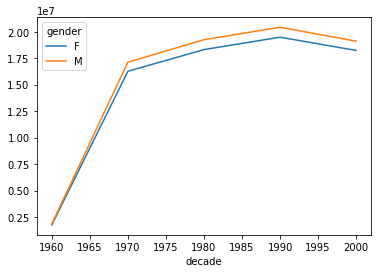

In [259]:
births.pivot_table('births', index = 'decade', columns = 'gender', aggfunc = 'sum').plot()

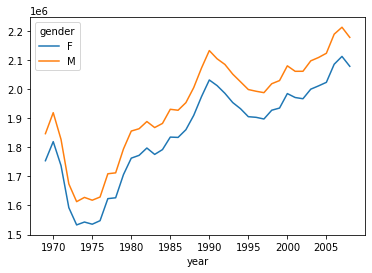

In [260]:
births.pivot_table('births', index = 'year', columns = 'gender', aggfunc = 'sum').plot()

# End